# Hospital Medical Charges

Obtained data on medical charges from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset) and used frequentist statistical inference on a data sample to answer the questions related to the hospital's buisness operations:
 1. Did the hospital's revenue stream fallen below a key threshold of $12,000?
 2. Are patients with health insurance being charged different amounts than those without health insurance?

For the purposes of this exercise, I assumed the observations are the result of random sampling from the hospital.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
import seaborn as sns 
medical = pd.read_csv('data/insurance2.csv')

sns.set()
sns.set_style({'axis.grid':False})

medical= pd.read_csv('data/insurance2.csv')

In [8]:
medical.shape

(1338, 8)

In [9]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


As a first step, I plotted a histogram of charges and calculated the mean and standard deviation to get an overall sense of what I am dealing with.

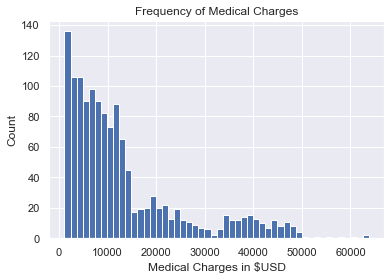

In [11]:
plt.hist(medical.charges, bins =50)
# Add title and axis names
plt.title('Frequency of Medical Charges')
plt.xlabel('Medical Charges in $USD')
plt.ylabel('Count')

plt.show()

In [20]:
#Calculating the mean and standard deviation
sample_mean= np.mean(medical['charges'])
sample_std= np.std(medical['charges'])

print('Mean:', sample_mean)
print('Standard Deviation:', sample_std)

Mean: 13270.422265141257
Standard Deviation: 12105.484975561605


The historgram shows a distribution that is skewed right (also known as positively skewed) as seen below. The histogram is not symmetric around the mean. For a right skewed distribution, the mean is greater than the median and will be to the right ride of the median in the plot. Thus, in other words the median is closer to the first quartile than the third quartile. The computed statistics (mean and standard deviation) are not wrong. However, we will need to interpret any inferences about the population with a grain of salt since the data introduces biased point estimate - hence the skewed data. To combat this, I will need to introduce confidence intervals to make correct assumptions.

### Addressing Question 1: Did the hospital's revenue stream fallen below a key threshold of 12,000 USD?

##### Commentary:

The **one-sample t-test** and z-test are most appropriate frequentist test to conduct to help me to confirm if the hospital's revenue stream fallen below a key threshold of $12,000 because the data sufficiently meets the asusmptions for Central Limit Theorem (CLT):

1). It it is already stated that the data represents a random sample of charges, which satisfies the "Randomization Condition". <br> 

2). In the real world, indiviual medical charges are *independent* of each other and are practically random unless a huge epidemic occurs and there are freqeunt similar cases, which is not the case in this scenario. <br>

3). The sample is not normally distributed but the big sample size makes up for the non-normality. Thus "Sample Size Assumption" is met.<br>

In order to conduct **one-sample t-test**, I calculated the critical t-value using one-sided 95% confidence interval for the mean shown below. <br>  

**_Extra commentary:_** <br>
The justification for using one-sided interval is because it is directional by design and aims to support what our actions would be following a statistically significant result. When planning hospital operations, we decide that we will act a certain way if the result is better performance (in this case hospital's revenue stream), and act in another way if it is equal to or worse performance compared to the key threshold of $12,000, which can be considered the control in this case. However, this raises the question of how can we safequard the health of patients so that hospitals do not exploit the sick and people dealing with diseases while also keeping the hospital operational. This question is outside the scope of this project.  

#### Calculating One-sample T-value: 

In [62]:
# Calculating t-value in 95% confidence interval
p=0.05 
sample_size= medical.shape[0]
dof=sample_size-1 #degrees of freedom 

t_value = t.ppf(p,dof)
print("t-value:", t_value)

t-value: -1.6459941145571324


In [63]:
# Margin of Error = t-value*standard_error

standard_error= sample_std/(np.sqrt(sample_size))
margin_error= t_value*standard_error
print("The Margin of Error is:{} ".format(margin_error))

The Margin of Error is:-544.7314053390936 


In [66]:
sample_mean
interval_lower_bound = sample_mean + margin_error
interval_lower_bound

12725.690859802164

**Conclusion:** <br>
The calculated sample mean is 13,270.42 USD and the corresponding mean value for the t-value of -1.65 is $12,725.69 

Therefore, we can be confident 95 percent of the time that the mean of medical charges lies above the value of 12,725.69 USD, thus the hospital should not be concerned about its revenue stream falling below $12,000. 

### Addressing Question 2: Are patients with health insurance being charged different amounts than those without health insurance?

##### Commentary:

To address this second question, I used a two-sample t-test to convey if there is a statistically significant difference between the means of the two groups (medical charges for people **_with_** medical insurance vs. medical charges for people **_without_** medical insurance). I will make an an assumption that the variances of the two groups are homogenous. Thus, the null hypothesis and alternative hypothese are:

*Null hypothesis (H0):* there is **NO** difference in the amount charged between people with health insurance and the people without health insurance <br>
*Alternative hypothesis (Hα):* there **IS** a difference in the amount charged between people with health insurance and people without health insurance. 

I performed this hypothesis test both manually, using the above statistic formulas, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests). For the manual approach, I calculated the value of the test statistic and then its probability (the p-value). In the end I compared the results from both approaches.

#### Calculating Two-sample T-test: Manual Approach

The pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

In [38]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [39]:
# groupby insurance claim and find the row with(1) or without(0) insurance claims
grouped = medical.groupby('insuranceclaim')

# Calculate n (sample size) 
# (get the first value of the Series) 
# n0 --> no insurance
# n1 --> yes insurance 
n0 = grouped.count().loc[0][0]
n1 = grouped.count().loc[1][0]

# Calculate the mean
x0 = grouped.mean().loc[0,'charges']
x1 = grouped.mean().loc[1,'charges']

# Calculate the standard deviation
s0 = grouped.std().loc[0,'charges']
s1 = grouped.std().loc[1,'charges']

In [45]:
# Calculate pooled standard deviation (formula given above)

std_pool = np.sqrt(((n0-1) * (s0 ** 2) + (n1-1) * (s1 ** 2)) / (n0 + n1 - 2))

print("The pooled standard deviation is: {} ".format(std_pool))

The pooled standard deviation is: 11520.034268775256 


In [58]:
# Calculate t-statistic (using formula above)

t_value = (x0 - x1) / ((std_pool) * np.sqrt((1/n0) + (1/n1)))
print("t-value: {} ".format(t_value))

# Calculating the p-value using Cumulative Distribution Function (CDF)
p_value = t.cdf(t_value, n0+n1-2)

print("p-value: {}".format(p_value))

t-value: -11.89329903087671 
p-value: 2.230615115810486e-31


#### Calculating T-test: scipy.stats Function Approach

In [57]:
# T-test for two independent samples: ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True)
from scipy.stats import ttest_ind_from_stats
t_value, p_value = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print("Using the scipy.stats function gives us t-value of: {} and p-value of {}".format(t_value, p_value))

Using the scipy.stats function gives us t-value of: -11.893299030876712 and p-value of 4.461230231620717e-31


In the above calculations, I assumed the sample variances were equal. I performed the test again assuming the two groups have unequal variances (heteroscedastic). In this case, I performed what is named the Welch's t-test using the scipy.stats function:

In [67]:
# To perform the Welch's t-test you use the same scipy.stats function but set equal_var set to false since the Welch's ..
# calculation assumes unequal variances
t_welch, p_welch = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1, equal_var=False)

print("Unequal variances gives us t-value of: {} and p-value of {}".format(t_welch, p_welch))

Unequal variances gives us t-value of: -13.298031957975647 and p-value of 1.1105103216309438e-37


**Conclusion:** <br>
Since I set the confidence level to 0.95, then the alpha equals 0.05. By definition, the alpha level is the probability of rejecting the null hypothesis when the null hypothesis is true. In other words, it’s the probability of making a wrong decision. Since the p-value from both the manual approach and using the function approach are both less than alpha, which is the risk I am willing to take of making a wrong decision, then I reject the null hypothesis and conclude there is a statistically significant difference between medical charges for patients with health insurance and patients without health insurance.